In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casperfpga
import time
from lwa_f import snap2_fengine
from lwa_f import blocks
#from lwautils import lwa_arx 
import pandas as pd
from cr_functions import *
import struct
import math
from scipy import special as sp
from scipy import optimize as oz
from scipy import stats as st
from lwa_antpos import mapping

Read antpos from etcd


In [144]:
def single_board_snapshot_summary_plots(fname,boardnumber):
    #plot spectra
    fbins=np.linspace(0,197/2,int(1+4096/2))
    chanmap=np.loadtxt('channelmap.txt')
    snapshot=np.load(fname)


    fig1 = plt.figure(figsize=(20,15))
    for i in range(64):
        ax=fig1.add_subplot(8,8,1+i)
        fpgachan=chanmap[1,i]
        antname=mapping.snap2_to_antpol(boardnumber,fpgachan)
        ax.text(.5,.1,antname,horizontalalignment='center',transform=ax.transAxes)

        spec=np.fft.rfft(snapshot[:,i+4])
        plt.plot(fbins,np.log(np.square(np.abs(spec))))
        plt.ylim(0,25)
        if i > 55:
            plt.xlabel('frequency [MHz]')
        if i%8==0:
            plt.ylabel('power')

    fbins=np.linspace(0,197/2,int(1+4096/2))
    #isnormal=np.zeros(64)  

    #plot histogram
    fig2 = plt.figure(figsize=(20,15))
    for i in range(64):
        ax=fig2.add_subplot(8,8,1+i)
        #ax.text(.5,.5,int(chanmap[1,i]),horizontalalignment='center',transform=ax.transAxes)
        fpgachan=chanmap[1,i]
        antname=mapping.snap2_to_antpol(boardnumber,fpgachan)
        ax.text(.5,.5,antname,horizontalalignment='center',transform=ax.transAxes)


        plt.hist(snapshot[:,i+4])
        #isnormal[i] = st.normaltest(snapshot[:,i+4])[1]
        if i > 55:
            plt.xlabel('voltage [ADC units]')
        if i%8==0:
            plt.ylabel('Counts')
        #plt.xlim(-200,200)

    #plot timeseries
    fig3 = plt.figure(figsize=(20,15))
    for i in range(64):
        ax=fig3.add_subplot(8,8,1+i)
        #plt.title(i)
        plt.plot(snapshot[:,i+4])
        fpgachan=chanmap[1,i]
        antname=mapping.snap2_to_antpol(boardnumber,fpgachan)
        ax.text(.5,.5,antname,horizontalalignment='center',transform=ax.transAxes)
        if i > 55:
            plt.xlabel('time sample')
        if i%8==0:
            plt.ylabel('voltage [ADC units]')
    return


## Program board and initialize

In [9]:
brdname='snap11'
#load firmware and initialize etc
brd=snap2_fengine.Snap2Fengine(brdname)
casperbrd = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)

#ethernet readout works
fpgfile='/home/ubuntu/kp/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2022-04-14_0450.fpg'
fpgfile='/home/ubuntu/kp/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2022-09-02_1527.fpg'
#ethernet readout doesn't work
fpgfile='/home/ubuntu/kp/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2022-09-13_2121.fpg'

#testing
fpgfile='/home/ubuntu/kp/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2022-09-20_1316.fpg'

#brd.program(fpgfile)



2023-01-27 02:44:39,019 - lwa_f.blocks.block:snap11 - INFO - adc - Detected FMC ADC board on port 0
2023-01-27 02:44:39,362 - lwa_f.blocks.block:snap11 - INFO - adc - Detected FMC ADC board on port 1


In [16]:
brdname5='snap05'
#load firmware and initialize etc
brd5=snap2_fengine.Snap2Fengine(brdname)
casperbrd5 = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)


2023-01-27 02:49:46,082 - lwa_f.blocks.block:snap11 - INFO - adc - Detected FMC ADC board on port 0
2023-01-27 02:49:46,319 - lwa_f.blocks.block:snap11 - INFO - adc - Detected FMC ADC board on port 1


In [86]:
brd.initialize(read_only=False)
brd.sync.arm_sync()
brd.sync.sw_sync()

2023-01-01 17:19:52,328 - lwa_f.snap2_fengine:snap11 - INFO - Initializing block (writable): fpga
2023-01-01 17:19:52,329 - lwa_f.snap2_fengine:snap11 - INFO - Initializing block (writable): adc
2023-01-01 17:19:52,335 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 board 0: Setting clock source to 1
2023-01-01 17:19:52,344 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 board 1: Setting clock source to 1
2023-01-01 17:19:52,352 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 1 board 0: Setting clock source to 1
2023-01-01 17:19:52,361 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 1 board 1: Setting clock source to 1
2023-01-01 17:20:07,955 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 board 0 clock rates: [490720872, 98168196, 98169153, 0, 0]
2023-01-01 17:20:07,956 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 board 0: MMCM locked
2023-01-01 17:20:08,966 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 board 1 clock rates: [490623605, 98164536, 98204831, 98223060, 0]
2023-01-

100% (64 of 64) |########################| Elapsed Time: 0:00:12 Time:  0:00:12


2023-01-01 17:20:24,471 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 data lane delays:
[[336, 328, 344, 328, 336, 336, 328, 328], [352, 344, 344, 336, 344, 328, 328, 344], [328, 328, 336, 328, 328, 328, 320, 336], [344, 352, 344, 336, 344, 336, 344, 344], [360, 360, 360, 352, 352, 360, 352, 344], [304, 304, 312, 304, 304, 304, 304, 296], [336, 312, 320, 320, 320, 328, 312, 312], [344, 336, 336, 336, 336, 352, 352, 336]]
2023-01-01 17:20:24,471 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 0 data lane slacks:
[[32, 40, 32, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 32, 32, 40], [32, 32, 32, 32, 32, 32, 32, 24], [32, 40, 40, 32, 40, 32, 40, 40], [40, 40, 40, 40, 32, 40, 40, 40], [40, 40, 32, 40, 40, 40, 40, 32], [40, 32, 40, 32, 32, 32, 32, 32], [40, 40, 32, 32, 32, 32, 32, 32]]
2023-01-01 17:20:24,472 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,473 - lwa_f.blocks.block:snap11 - INF

2023-01-01 17:20:24,507 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,508 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,508 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,509 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,509 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,510 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:24,511 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

100% (64 of 64) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


2023-01-01 17:20:35,421 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 1 data lane delays:
[[304, 304, 296, 312, 304, 296, 288, 304], [328, 328, 328, 328, 328, 344, 336, 328], [296, 288, 288, 304, 288, 304, 296, 288], [320, 336, 320, 328, 328, 328, 320, 328], [304, 312, 312, 328, 320, 312, 312, 312], [304, 312, 312, 304, 320, 304, 312, 312], [304, 304, 304, 304, 304, 296, 296, 304], [312, 312, 320, 320, 312, 312, 320, 312]]
2023-01-01 17:20:35,421 - lwa_f.blocks.block:snap11 - INFO - adc - FMC 1 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 32], [40, 32, 40, 40, 40, 40, 40, 40], [40, 40, 40, 32, 32, 32, 40, 40], [40, 32, 32, 40, 40, 32, 32, 40], [40, 40, 40, 40, 40, 40, 40, 40], [32, 40, 40, 32, 40, 32, 32, 32], [32, 32, 32, 32, 32, 32, 32, 32], [32, 40, 40, 40, 40, 40, 40, 40]]
2023-01-01 17:20:35,422 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,423 - lwa_f.blocks.block:snap11 - INF

2023-01-01 17:20:35,455 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,455 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,456 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,457 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,457 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,458 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXX
2023-01-01 17:20:35,458 - lwa_f.blocks.block:snap11 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

## Set the data source

In [88]:
setup_data_source(casperbrd,"adc")  #set it to adc here

#then set the counter test signal BEFORE the cosmic ray block
#print(casperbrd.read_int('set_counter_test_signal'))
#casperbrd.write_int('set_counter_test_signal',1)
print(casperbrd.read_int('set_counter_test_signal'))

Data source set to adc
0


## First, Send a snapshot from software and check that it's correct
I repeat the tests below with the data source set to "constant", "counter", and "adc", setting the data type in the capture software to unsigned for the first two and signed for the last.

In [10]:
#prepare to send a snapshot
setup_data_source(casperbrd,"adc")
setup_ethernet(brdname,casperbrd,fpgfile,'lwacr',200)
setvalue(casperbrd,'brd_id','cr_registers.xlsx',11)

#enable ethernet
setvalue(casperbrd,'eth_enable','cr_registers.xlsx',1)
#send trigger
software_trigger(casperbrd,1)

Data source set to adc
------------------------
snap11:cosmic_ray_cr_forty_gbe configuration:
MAC:  02:02:02:11:11:11
Gateway:  0.0.0.1
IP:  10.41.0.211
Fabric port: 
11111
Fabric interface is currently: Enabled
	base_ip: 255.255.255.255
	ip_mask: 255.255.255.255
	rx_ips: []
ARP Table: 
IP: 10.41.0. 58: MAC: 04:3F:72:DF:C2:F8
Setting wait between packets to 200
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 29248 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0


In [12]:
def setup_ethernet_test(brdname,brd,fpgfile,destinationcomputer,port,packetwait):
    #this function configures the 40Gb block and sets the destination IP and Port and the number of clock cycles between packets
    #It does not enable the valid and end of frame signals, so no data will be sent until running enable_ethernet(brd)
    #brdname is the network name of a SNAP2
    #brd is a casperfpga object that connects to that SNAP2
    #fpgfile is the path to the fpgfile that is already programmed on the board
    #destinationcomputer is the name, either "minor" or "lwacr", of the computer to which to send the data
    #packetwait is the number of clock cycles to wait between packets
    ######################## Define Addresses #############################
    if brdname=='snap2-rev2-9':
        ip = '192.168.41.13'
        mac = 0x020202030303
    if brdname=='snap2-rev2-11':
        ip='192.168.41.14'
        mac=0x020202040404
    if brdname=='snap2-rev2-12':
        ip='192.168.41.15'
        mac=0x020202050505
    if brdname=='snap01':
        ip='10.41.0.201'
        mac=0x020202010101
    if brdname=='snap02':
        ip='10.41.0.202'
        mac=0x020202020202
    if brdname=='snap03':
        ip='10.41.0.203'
        mac=0x020202030303
    if brdname=='snap04':
        ip='10.41.0.204'
        mac=0x020202040404
    if brdname=='snap05':
        ip='10.41.0.205'
        mac=0x020202050505
    if brdname=='snap06':
        ip='10.41.0.206'
        mac=0x020202060606
    if brdname=='snap07':
        ip='10.41.0.207'
        mac=0x020202070707
    if brdname=='snap08':
        ip='10.41.0.208'
        mac=0x020202080808
    if brdname=='snap09':
        ip='10.41.0.209'
        mac=0x020202090909
    if brdname=='snap10':
        ip='10.41.0.210'
        mac=0x020202101010
    if brdname=='snap11':
        ip='10.41.0.211'
        mac=0x020202111111

    #configure the 40 Gbe core
    brd.get_system_information(fpgfile)
    if destinationcomputer == 'lwacr':
        setvalue(brd,'dest_ip','cr_registers.xlsx',(10<<24)+(41<<16)+(0<<8)+58)
        setvalue(brd,'cr_dest_port','cr_registers.xlsx',port)
        brd.gbes.cosmic_ray_cr_forty_gbe.configure_core(mac, ip, port)
        brd.gbes.cosmic_ray_cr_forty_gbe.set_single_arp_entry('10.41.0.58',  0x043f72dfc2f8)
        brd.gbes.cosmic_ray_cr_forty_gbe.print_gbe_core_details(arp=True)

    elif destinationcomputer == 'minor':
        setvalue(brd,'dest_ip','cr_registers.xlsx',3232246028)
        setvalue(brd,'cr_dest_port','cr_registers.xlsx',port)
        brd.gbes.cosmic_ray_cr_forty_gbe.configure_core(mac, ip, port)
        brd.gbes.cosmic_ray_cr_forty_gbe.set_single_arp_entry('192.168.41.12', 0x98039b3d8b7b)
        brd.gbes.cosmic_ray_cr_forty_gbe.print_gbe_core_details(arp=True)
    else:
        print(destination + " is not a recognized destination.")
    
    #set wait time
    if packetwait:
        print("Setting wait between packets to "+str(packetwait))
        setvalue(brd,'wait_between_packets', 'cr_registers.xlsx', packetwait)

    #reset the board to listening
    reset_to_listen(brd)
    
    return



In [15]:
print(brdname5)

snap5


In [19]:
#prepare to send a snapshot
setup_data_source(casperbrd5,"adc")
setup_ethernet_test(brdname5,casperbrd5,fpgfile,'lwacr',11112,200)
setvalue(casperbrd5,'brd_id','cr_registers.xlsx',11)

#enable ethernet
setvalue(casperbrd5,'eth_enable','cr_registers.xlsx',1)
#send trigger
software_trigger(casperbrd5,1)

Data source set to adc
------------------------
snap11:cosmic_ray_cr_forty_gbe configuration:
MAC:  02:02:02:05:05:05
Gateway:  0.0.0.1
IP:  10.41.0.205
Fabric port: 
11112
Fabric interface is currently: Enabled
	base_ip: 255.255.255.255
	ip_mask: 255.255.255.255
	rx_ips: []
ARP Table: 
IP: 10.41.0. 58: MAC: 04:3F:72:DF:C2:F8
Setting wait between packets to 200
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 29248 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0


In [93]:
getvalue(casperbrd,"count_triggers","cr_registers.xlsx")


3

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubun

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubun

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/ubun

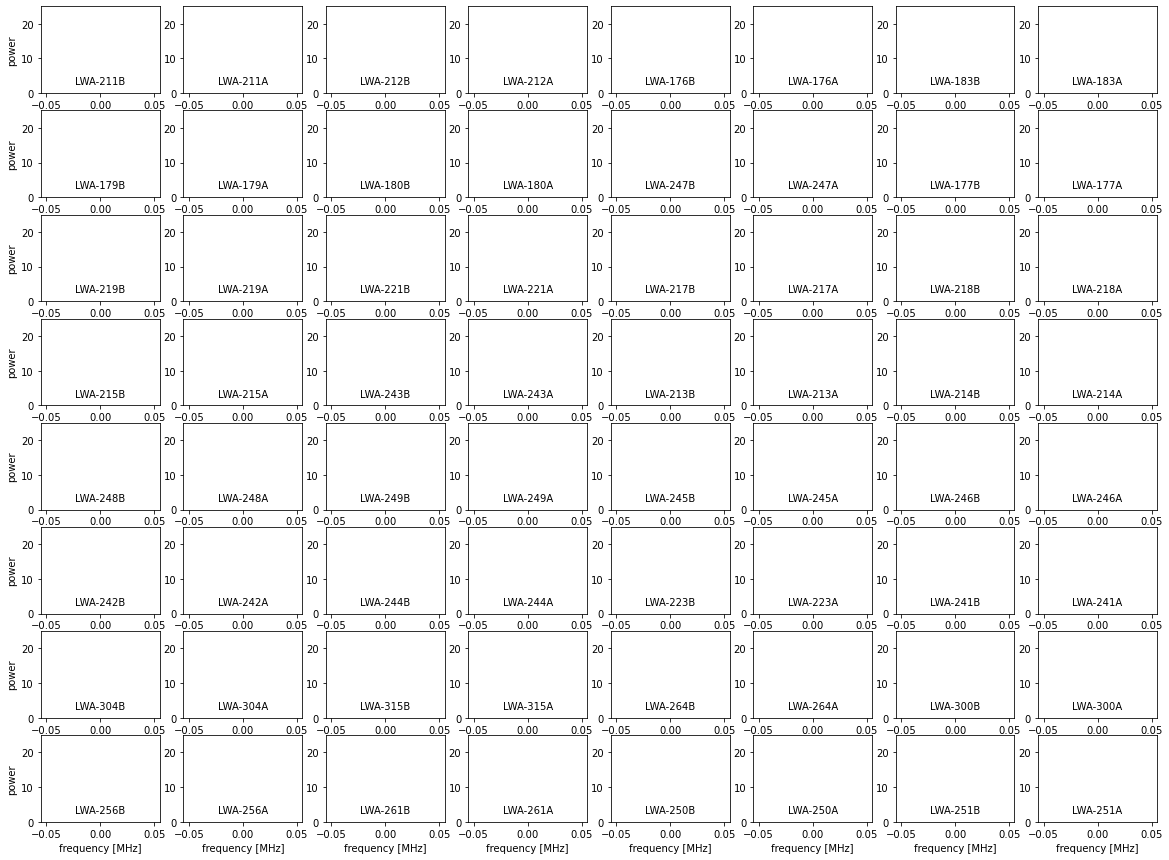

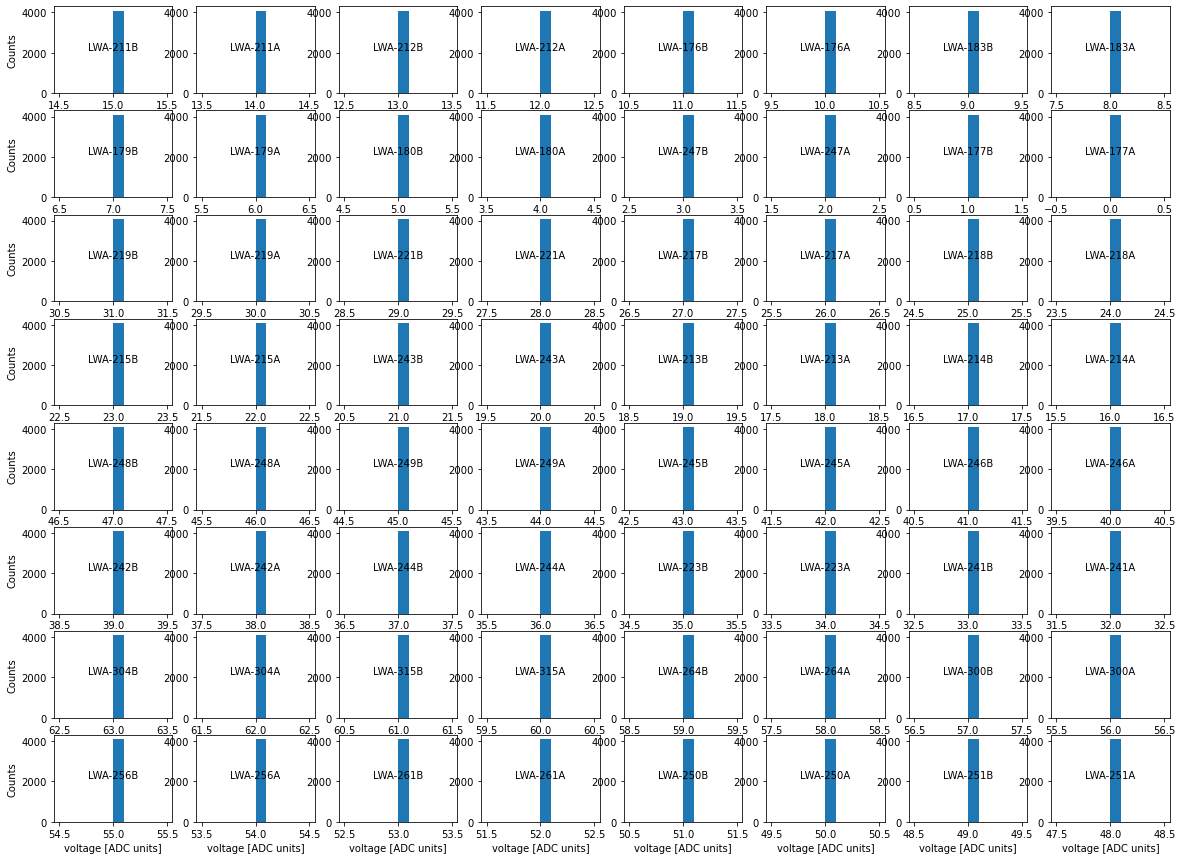

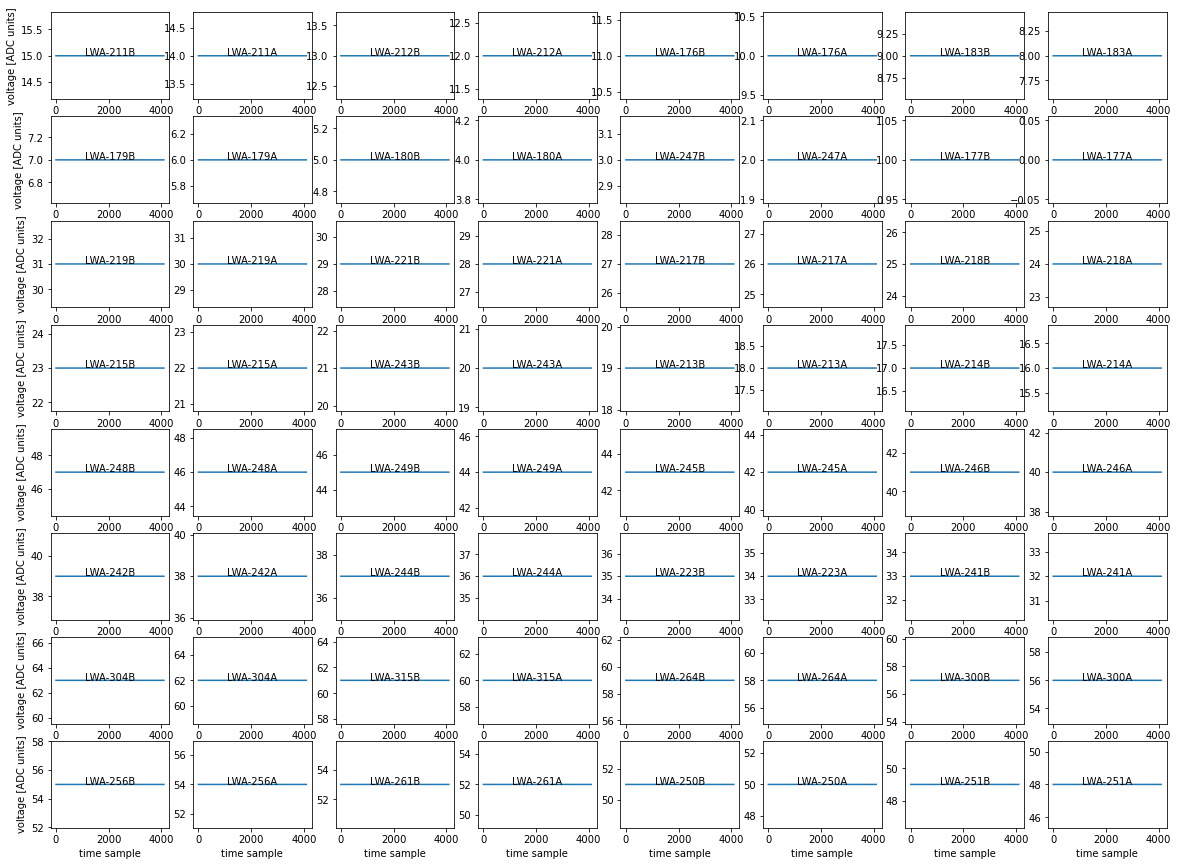

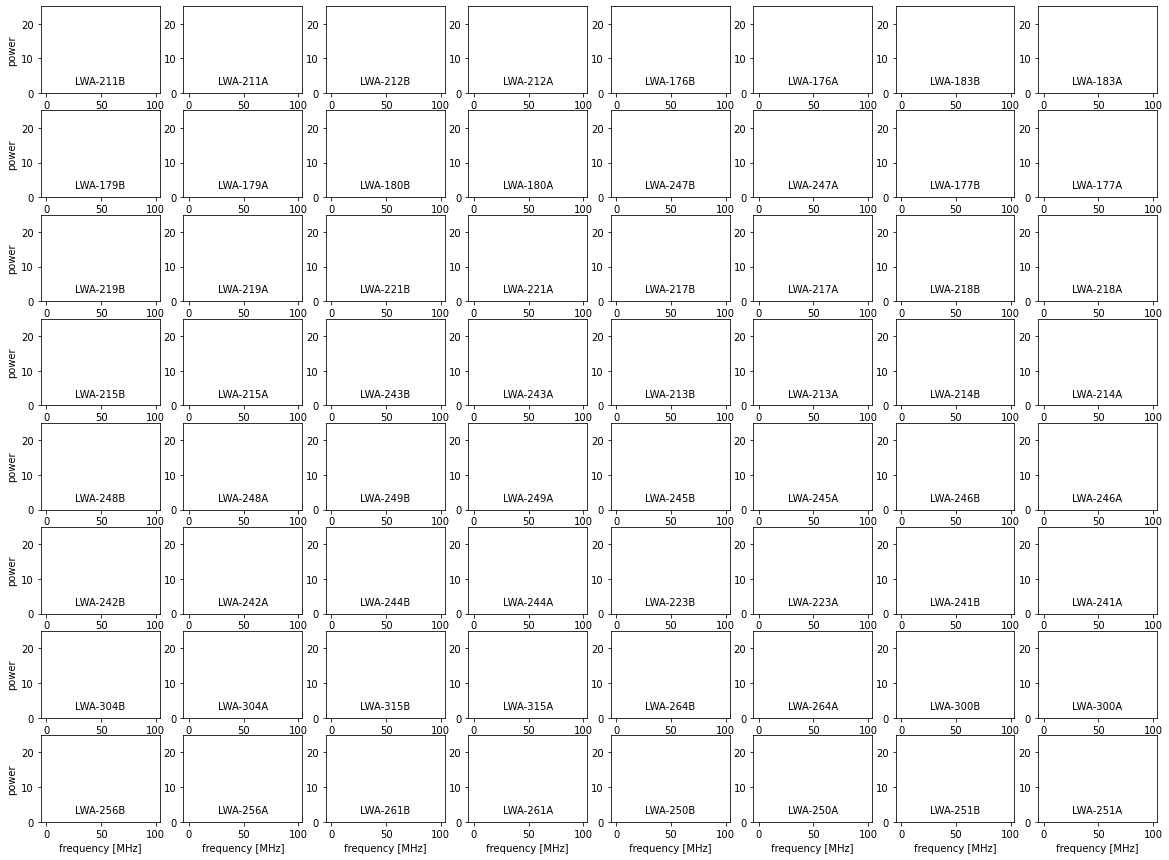

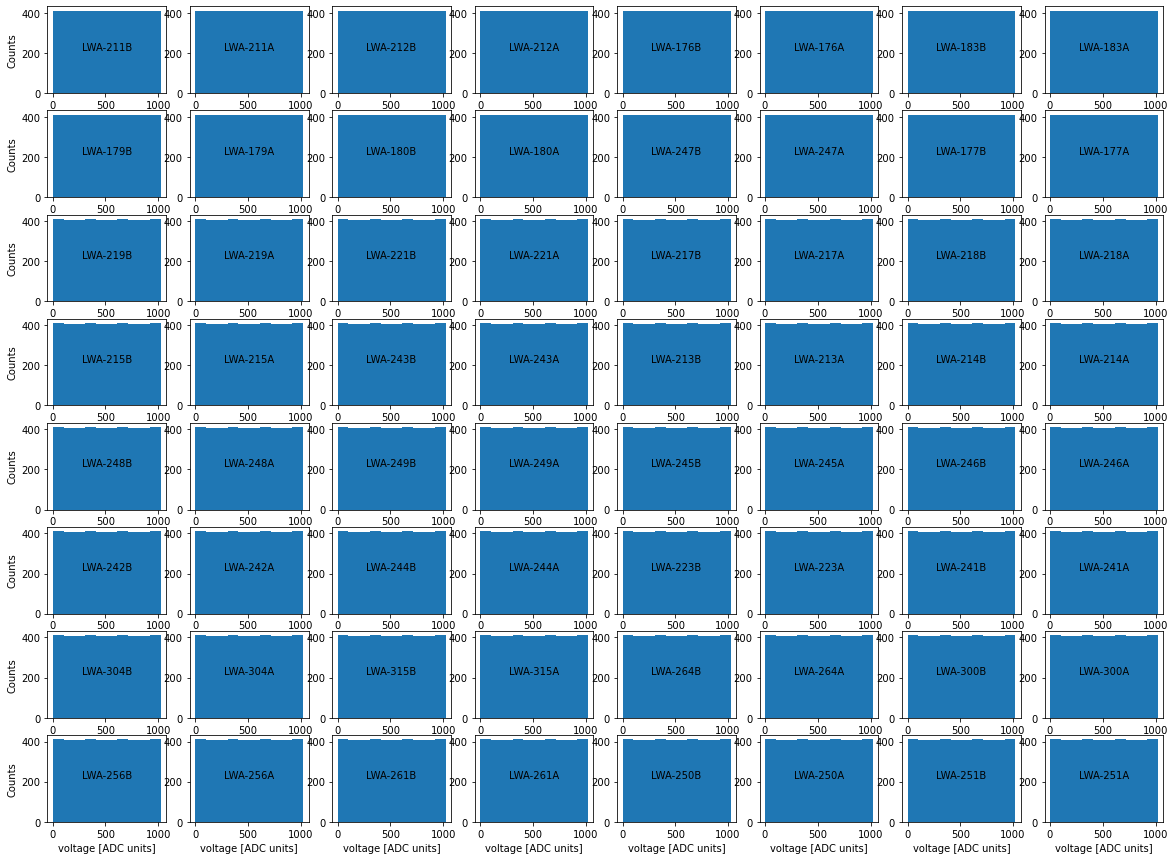

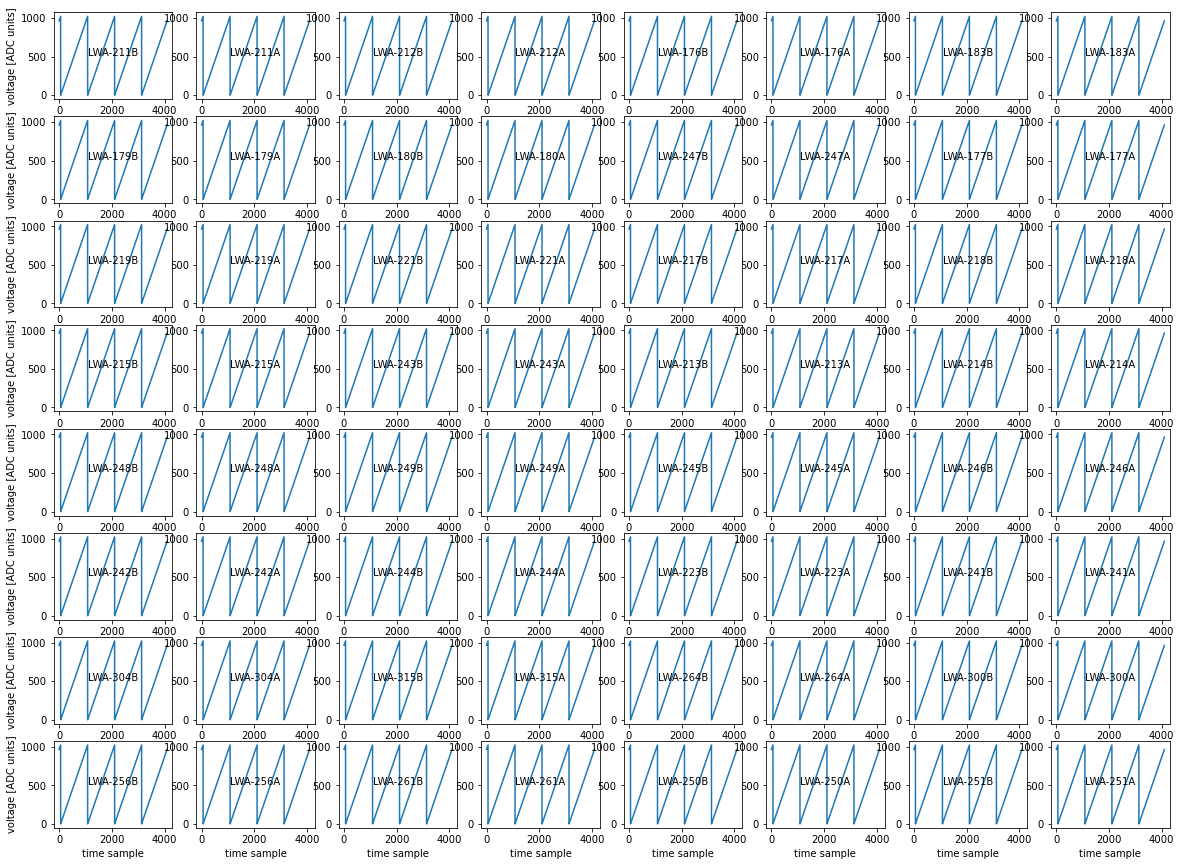

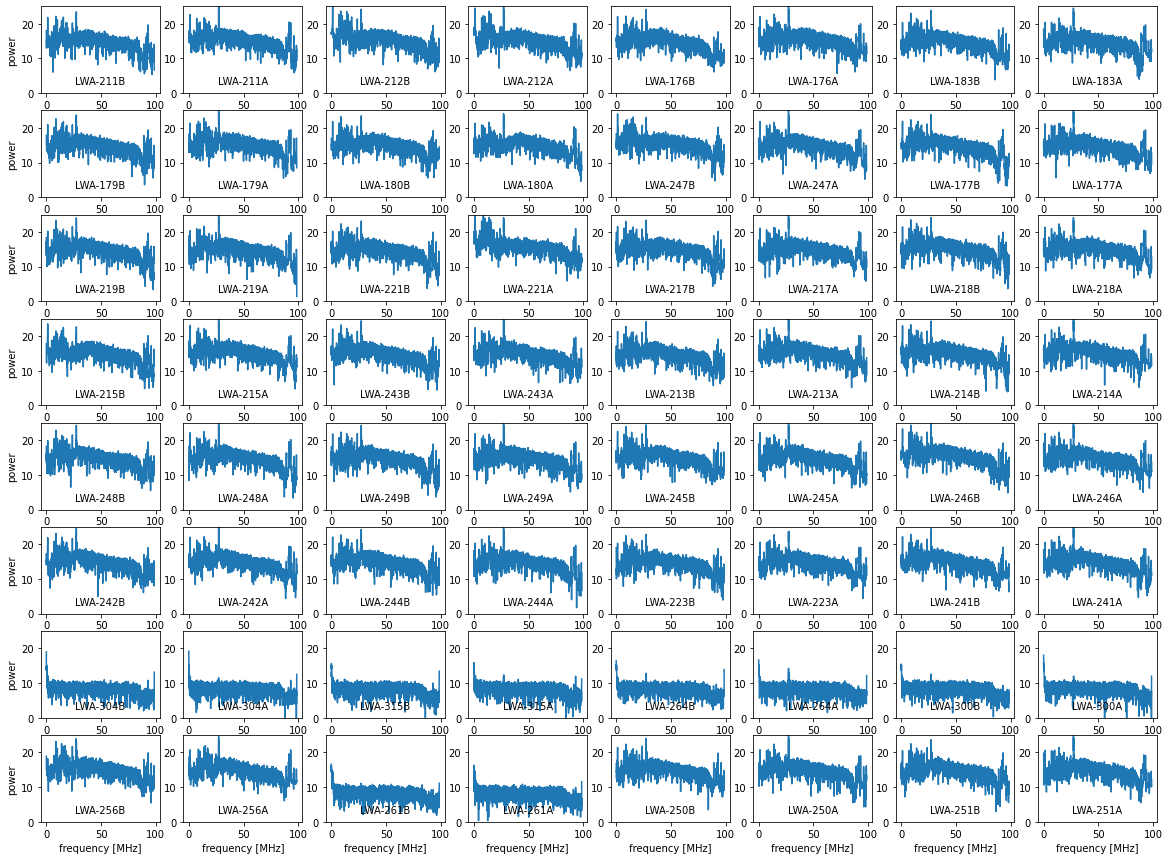

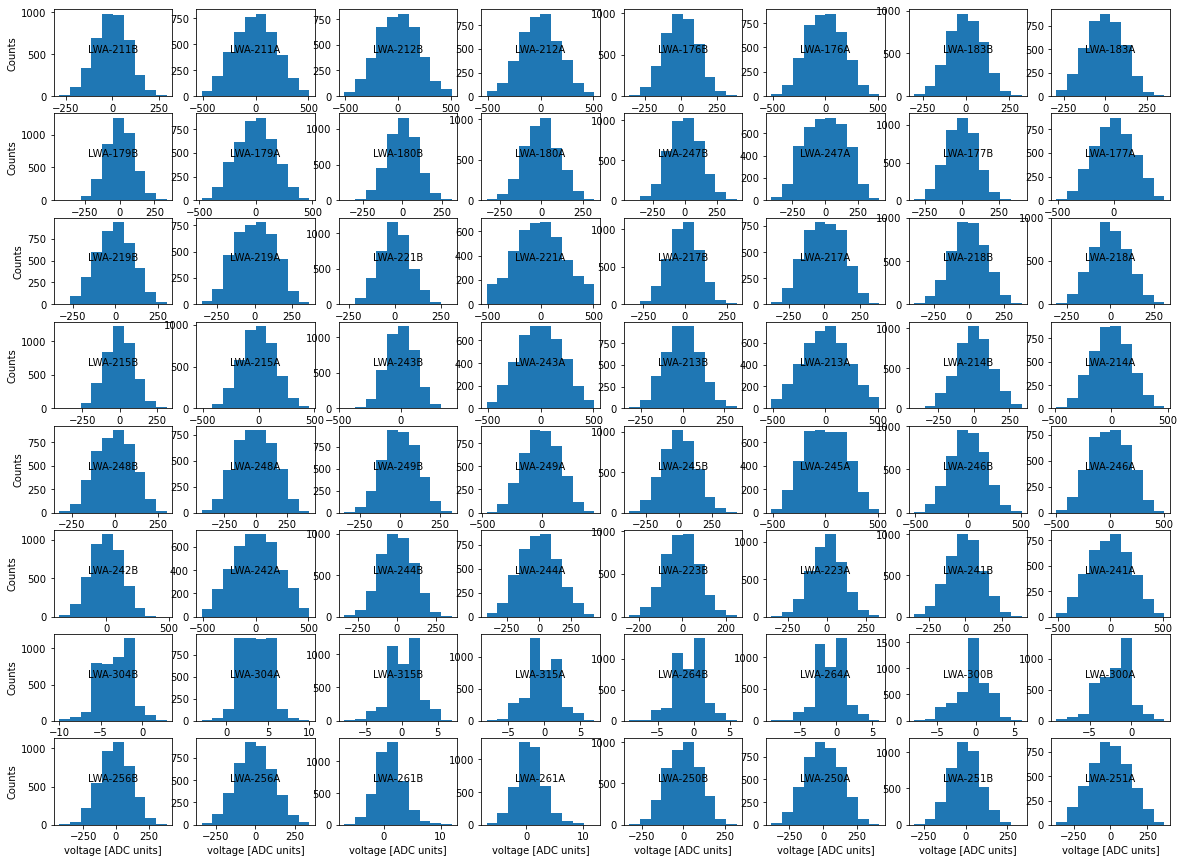

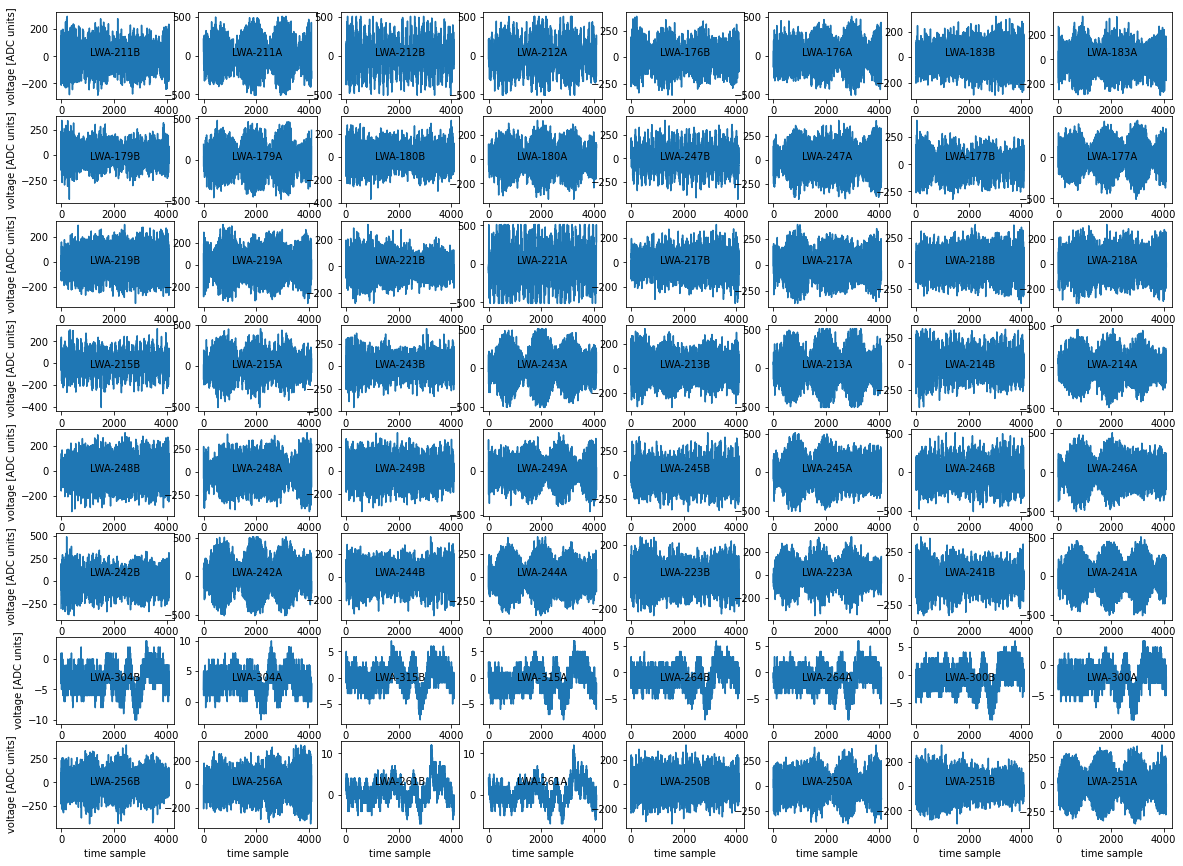

In [101]:
single_board_snapshot_summary_plots('/home/ubuntu/kp/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1672594278.7080915_0_0.npy',11)
single_board_snapshot_summary_plots('/home/ubuntu/kp/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1672594311.6097655_0_0.npy',11)
single_board_snapshot_summary_plots('/home/ubuntu/kp/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1672594342.3058033_0_0.npy',11)

NameError: name 'single_board_snapshot_summary_plots' is not defined

## Run internal trigger with a fake signal that has a regular coincidence

In [104]:
# set the counter test signal BEFORE the delay block
print(casperbrd.read_int('set_counter_test_signal'))
casperbrd.write_int('set_counter_test_signal',1)

0


In [105]:
#define parameters
trigger_power_thresh=511**2
veto_power_thresh=511**2
core_roles_array=np.zeros(64,dtype=int)
core_roles_array[0:3]=1
veto_roles_array=np.zeros(64,dtype=int)
veto_roles_array[3:6]=1
antenna_number_thresh=2
veto_number_thresh=2
delays=np.ones(64,dtype=int)
delays[0:6]=[1,5,10,450,500,508] #core antennas are first three, veto antennas are second three
trigger_window=11
veto_window=62

In [106]:
#set up the coincidencer
setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
set_delays(casperbrd,delays)



In [109]:
#enable internal trigger for a limited period of time

setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)
time.sleep(1)
setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0)

In [108]:
#software_trigger(casperbrd,1)

In [84]:
# reset trigger counter
    #setvalue(casperbrd,"trig_debug_reset","cr_registers.xlsx",1)
    #time.sleep(0.003)
    #setvalue(casperbrd,"trig_debug_reset","cr_registers.xlsx",0)
    internal_trigger_count1=getvalue(casperbrd,"internal_trigger_count","cr_registers.xlsx")

    time.sleep(2.75)  #have to wait for it to update
    trigger_count=getvalue(casperbrd,"count_triggers","cr_registers.xlsx")
    internal_trigger_count2=getvalue(casperbrd,"internal_trigger_count","cr_registers.xlsx")
    triggers_leaving_block=(internal_trigger_count2-internal_trigger_count1)
    veto_coincidence,core_coincidence=struct.unpack('>2l',casperbrd.read("cosmic_ray_core_and_veto_rate",2*4,0))
    #internal_triggers=struct.unpack('>2l',casperbrd.read("cosmic_ray_internal_trigger_rate",2*4,0)) #does not work.
    print("Core coincidence per 10b cycle: ", core_coincidence/262144.)
    print("Veto coincidence per 10b cycle: ", veto_coincidence/262144.)
    print("Triggers at state control ",trigger_count)
    #print("Triggers leaving coincidence_trigger block per cycle", internal_triggers) #bram counter doesn't work
    print("Triggers leaving block", triggers_leaving_block)

Core coincidence per 10b cycle:  1.0
Veto coincidence per 10b cycle:  1.0
Triggers at state control  197548
Triggers leaving block 539247


# Scratch

In [12]:
casperbrd2=casperfpga.CasperFpga('snap02')
#version with old packetizer
#fpgfile="/home/ubuntu/proj/lwa-shell/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2022-12-15_2103.fpg"

#first version with new packetizer  --NO THIS IS WRONG!
#fpgfile='/home/ubuntu/kp/snap2_f_200msps_64i_4096c_2022-09-20_1316.fpg'

#THIS is the first version with the new packetizer
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-02-28_1736.fpg'
#fix header bitwidth 
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-07_1536.fpg'
#attempts to fix problems with number and length of packets
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-10_1527.fpg'

#attempt fix some signed vs unsigned data type problems and fix problem of antenna counter staying at 1 between cycles
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-13_2233.fpg'


#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-15_1241.fpg'
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-15_1709.fpg'
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-16_1451.fpg'
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-16_1721.fpg'
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-22_1143.fpg'
#fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-22_1755.fpg'
fpgfile='/home/ubuntu/kp/cosmic_ray_system_2023-03-23_1205.fpg'

In [13]:
casperbrd2.upload_to_ram_and_program(fpgfile)

100% (187 of 187) |######################| Elapsed Time: 0:01:44 Time:  0:01:44


In [138]:
#casperbrd2.write_int('cosmic_ray_buffer_and_packetizer_debug_delay',7)
#casperbrd2.read_int('cosmic_ray_buffer_and_packetizer_debug_delay')

In [16]:
#prepare to send a snapshot
setup_data_source(casperbrd2,"longcounter")
setup_ethernet('snap02',casperbrd2,fpgfile,'lwacr',500)
setvalue(casperbrd2,'brd_id','cr_registers.xlsx',2)
#enable ethernet
setvalue(casperbrd2,'eth_enable','cr_registers.xlsx',1)
#send trigger
software_trigger(casperbrd2,1)

Data source set to longcounter
------------------------
snap02:cosmic_ray_cr_forty_gbe configuration:
MAC:  02:02:02:02:02:02
Gateway:  0.0.0.1
IP:  10.41.0.202
Fabric port: 
11111
Fabric interface is currently: Enabled
	base_ip: 255.255.255.255
	ip_mask: 255.255.255.255
	rx_ips: []
ARP Table: 
IP: 10.41.0. 58: MAC: 04:3F:72:DF:C2:F8
Setting wait between packets to 500
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 163269 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0


In [46]:
setvalue(casperbrd2,'eth_enable','cr_registers.xlsx',0)


In [26]:
#make sure none of the other boards are sending packets
brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']

casperbrds=[casperfpga.CasperFpga(brdname) for brdname in brdnames]

[setvalue(casperbrd,'eth_enable','cr_registers.xlsx',0) for casperbrd in casperbrds]


[None, None, None, None, None, None, None, None, None, None, None]

In [57]:
brdnames=['snap02']
fpgfile='/home/ubuntu/proj/lwa-shell/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c.fpg'
brds=[snap2_fengine.Snap2Fengine(brdname) for brdname in brdnames] 

[brd.program(fpgfile) for brd in brds] 

[brd.initialize(read_only=False) for brd in brds] 

[brd.sync.arm_sync() for brd in brds] 

[brd.sync.sw_sync() for brd in brds] 

2023-03-09 02:03:02,048 - lwa_f.blocks.block:snap02 - ERROR - adc - Failed to check ADC control register on fmc 0
2023-03-09 02:03:02,767 - lwa_f.blocks.block:snap02 - ERROR - adc - Failed to check ADC control register on fmc 1
2023-03-09 02:03:02,769 - lwa_f.blocks.block:snap02 - WARNING - eth - Couldn't find Ethernet core. Will retry later
2023-03-09 02:03:02,773 - lwa_f.blocks.block:snap02 - WARNING - powermon - Couldn't initialize because I2C interface not found. Will try again later
2023-03-09 02:03:02,775 - lwa_f.snap2_fengine:snap02 - INFO - Loading firmware /home/ubuntu/proj/lwa-shell/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2023-03-08_1538.fpg to snap02


100% (580 of 580) |######################| Elapsed Time: 0:04:52 Time:  0:04:52


2023-03-09 02:08:18,392 - lwa_f.blocks.block:snap02 - INFO - adc - Detected FMC ADC board on port 0
2023-03-09 02:08:18,834 - lwa_f.blocks.block:snap02 - INFO - adc - Detected FMC ADC board on port 1
2023-03-09 02:08:18,834 - lwa_f.blocks.block:snap02 - WARNING - eth - Couldn't find Ethernet core. Will retry later
2023-03-09 02:08:18,848 - lwa_f.snap2_fengine:snap02 - INFO - Initializing block (writable): fpga
2023-03-09 02:08:18,849 - lwa_f.snap2_fengine:snap02 - INFO - Initializing block (writable): adc
2023-03-09 02:08:18,851 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 0 board 0: Setting clock source to 1
2023-03-09 02:08:18,857 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 0 board 1: Setting clock source to 1
2023-03-09 02:08:18,865 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 1 board 0: Setting clock source to 1
2023-03-09 02:08:18,871 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 1 board 1: Setting clock source to 1
2023-03-09 02:08:28,585 - lwa_f.blocks.block:snap02 - INF

100% (64 of 64) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


2023-03-09 02:08:44,363 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 0 data lane delays:
[[304, 288, 304, 288, 296, 288, 288, 288], [328, 304, 304, 312, 312, 312, 304, 312], [304, 312, 304, 304, 296, 296, 304, 312], [312, 320, 312, 312, 312, 312, 312, 312], [344, 344, 344, 344, 336, 336, 336, 0], [272, 272, 280, 248, 272, 272, 272, 264], [288, 272, 272, 280, 280, 296, 280, 272], [312, 312, 312, 312, 312, 328, 328, 304]]
2023-03-09 02:08:44,364 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 0 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 32, 32, 40, 40], [32, 32, 32, 40, 32, 32, 32, 32], [40, 40, 40, 40, 40, 32, 40, 0], [40, 40, 32, 24, 40, 40, 40, 32], [40, 40, 40, 32, 32, 40, 32, 40], [32, 40, 40, 40, 32, 40, 32, 32]]
2023-03-09 02:08:44,365 - lwa_f.blocks.block:snap02 - WARNING - adc - Delay solutions have small slack
2023-03-09 02:08:44,367 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXX

2023-03-09 02:08:44,399 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 1:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:44,400 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:44,400 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:44,401 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:44,401 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:44,402 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:44,402 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 7:    XXXXXXXX

100% (64 of 64) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


2023-03-09 02:08:55,932 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 1 data lane delays:
[[344, 344, 344, 344, 336, 336, 336, 352], [320, 328, 328, 312, 328, 336, 320, 320], [312, 312, 312, 328, 312, 328, 312, 312], [304, 320, 312, 304, 312, 312, 312, 304], [304, 304, 304, 320, 312, 304, 304, 304], [272, 264, 272, 264, 272, 272, 272, 272], [320, 312, 320, 328, 320, 320, 320, 320], [320, 320, 320, 312, 312, 312, 312, 312]]
2023-03-09 02:08:55,932 - lwa_f.blocks.block:snap02 - INFO - adc - FMC 1 data lane slacks:
[[40, 40, 40, 32, 40, 40, 40, 40], [32, 32, 40, 40, 32, 32, 32, 32], [32, 40, 32, 40, 32, 40, 32, 32], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 48, 48, 40, 48, 40, 48], [32, 32, 40, 32, 32, 32, 32, 32], [32, 32, 32, 32, 40, 40, 32, 32], [40, 32, 32, 40, 32, 40, 40, 40]]
2023-03-09 02:08:55,933 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXX
2023-03-09 02:08:55,934 - lwa_f.blocks.block:snap02 - INF

2023-03-09 02:08:55,978 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:55,979 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXX
2023-03-09 02:08:55,979 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:55,980 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:55,981 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:55,981 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXX
2023-03-09 02:08:55,982 - lwa_f.blocks.block:snap02 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

[None]

In [5]:
brd=snap2_fengine.Snap2Fengine('snap02')


2023-03-07 01:32:20,101 - lwa_f.blocks.block:snap02 - INFO - adc - Detected FMC ADC board on port 0
2023-03-07 01:32:20,448 - lwa_f.blocks.block:snap02 - INFO - adc - Detected FMC ADC board on port 1


In [10]:
casperbrd2.is_programmed()

AttributeError: 'CasperFpga' object has no attribute 'is_programmed'

In [14]:
brd.is_running()

AttributeError: 'Snap2Fengine' object has no attribute 'is_running'